# Sajid Ahmadzai-CSC115-Assignment 4.2: Advance Statistical Methods for Data Analysis

# Import libraries

In [15]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load the Iris dataset and create DataFrame

In [16]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# 1. Perform a t-test to compare the sepal length between iris species

In [18]:
setosa_sepal = iris_df[iris_df['species'] == 'setosa']['sepal length (cm)']
versicolor_sepal = iris_df[iris_df['species'] == 'versicolor']['sepal length (cm)']
virginica_sepal = iris_df[iris_df['species'] == 'virginica']['sepal length (cm)']

t_stat_set_ver, p_val_set_ver = stats.ttest_ind(setosa_sepal, versicolor_sepal)
t_stat_ver_vir, p_val_ver_vir = stats.ttest_ind(versicolor_sepal, virginica_sepal)
t_stat_set_vir, p_val_set_vir = stats.ttest_ind(setosa_sepal, virginica_sepal)

print("T-test results for sepal length:")
print(f"Setosa vs Versicolor: t-statistic = {t_stat_set_ver:.4f}, p-value = {p_val_set_ver:.4f}")
print(f"Versicolor vs Virginica: t-statistic = {t_stat_ver_vir:.4f}, p-value = {p_val_ver_vir:.4f}")
print(f"Setosa vs Virginica: t-statistic = {t_stat_set_vir:.4f}, p-value = {p_val_set_vir:.4f}")

T-test results for sepal length:
Setosa vs Versicolor: t-statistic = -10.5210, p-value = 0.0000
Versicolor vs Virginica: t-statistic = -5.6292, p-value = 0.0000
Setosa vs Virginica: t-statistic = -15.3862, p-value = 0.0000


# 2. Calculate a 95% confidence interval for the petal length of the setosa species

In [19]:
setosa_petal = iris_df[iris_df['species'] == 'setosa']['petal length (cm)']
confidence_level = 0.95
mean_petal = np.mean(setosa_petal)
std_error = stats.sem(setosa_petal)
confidence_interval = stats.t.interval(confidence_level, len(setosa_petal)-1, mean_petal, std_error)
print("\n95% Confidence Interval for Setosa Petal Length:", confidence_interval)


95% Confidence Interval for Setosa Petal Length: (np.float64(1.4126452382875103), np.float64(1.51135476171249))


# 3. Compare the mean sepal width between versicolor and virginica species using a hypothesis test

In [20]:
versicolor_width = iris_df[iris_df['species'] == 'versicolor']['sepal width (cm)']
virginica_width = iris_df[iris_df['species'] == 'virginica']['sepal width (cm)']
t_stat_width, p_val_width = stats.ttest_ind(versicolor_width, virginica_width)
print("\nHypothesis test for sepal width (Versicolor vs Virginica):")
print(f"t-statistic = {t_stat_width:.4f}, p-value = {p_val_width:.4f}")


Hypothesis test for sepal width (Versicolor vs Virginica):
t-statistic = -3.2058, p-value = 0.0018


# 4. Compute the correlation matrix between all pairs of features and visualize it

In [ ]:
#Print the first 5 rows to observe your data
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2



Correlation Matrix:
                    sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


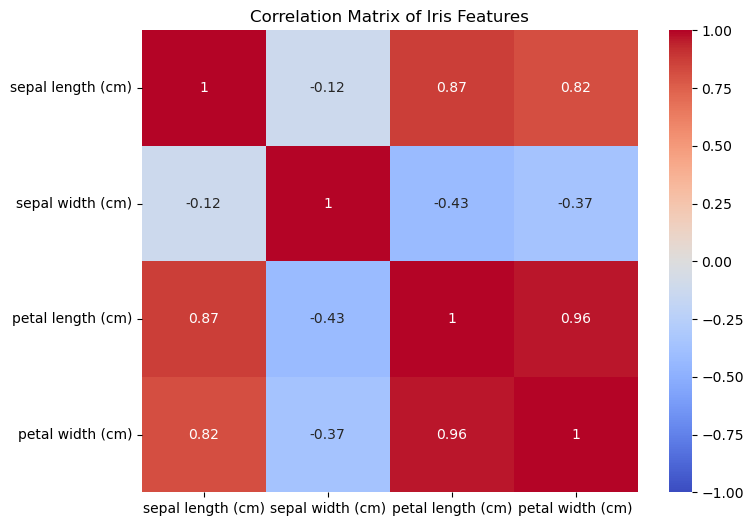

In [22]:
correlation_matrix = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Iris Features')
plt.show()